# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

In [3]:
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
import requests

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
rq = requests.get(url)
with open('image-predictions.tsv', mode='wb') as f:
    f.write(rq.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
import json
import tweepy

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
## Unable to get Tweets from Twitter API because of unavailability of get tweets under free developer account.
## They have moved get tweets api under basic plan which is chargeable.
## I have written below code to retrieve tweets and store data in tweet-json.txt in local
## To proceed with project, i am going to use tweet_json.txt file which UDACITY has provided

tweet_id_list = list(twitter_df.tweet_id)
deleted_tweet_ids = []
with open('tweet-json.txt', mode='a') as f:
    for _id in tweet_id_list:
        try:
            tweet_json=api.get_status(_id)._json
            json.dump(tweet_json,f)
            f.write('\n')
            print(_id)
        except:
            deleted_tweet_ids.append(id)       

In [8]:
## I am using tweet_json.txt provided by UDACITY as I mentioned above

tweet_id_list = list(twitter_df.tweet_id)
tweets_list = []
with open('tweet_json.txt', mode='r') as f:
    for tweet_id in tweet_id_list:
        tweets_list.append(f.readline())
    
tweet_count_list = []
for tweet in tweets_list:
    if tweet!='':
        tweet_id = json.loads(tweet)['id']
        retweet_count = json.loads(tweet)['retweet_count']
        favorite_count = json.loads(tweet)['favorite_count']

        tweet_count_list.append({'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})
        
tweet_count_df = pd.DataFrame(tweet_count_list,columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_count_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [10]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [12]:
predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
predictions_df.p1.value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          20
Cardigan                           19
web_site                           19
Eskimo_dog                         18
Maltese_dog                        18
Shetland_sheepdog                  18
teddy                              18
beagle                             18
Lakeland_terrier                   17
Rottweiler  

In [15]:
predictions_df.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
Samoyed                            20
toy_terrier                        20
malinois                           20
miniature_pinscher                 20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [16]:
predictions_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [17]:
predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,1.566650e-01,True,Shetland_sheepdog,6.142850e-02,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,7.419170e-02,True,Rhodesian_ridgeback,7.201000e-02,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,1.385840e-01,True,bloodhound,1.161970e-01,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,3.606870e-01,True,miniature_pinscher,2.227520e-01,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,2.436820e-01,True,Doberman,1.546290e-01,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,2.637880e-01,True,Greater_Swiss_Mountain_dog,1.619920e-02,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,5.827940e-02,True,fur_coat,5.444860e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,1.923050e-01,True,soft-coated_wheaten_terrier,8.208610e-02,True


In [18]:
## I am using tweet_json.txt provided by UDACITY as I mentioned earlier in Data Gathering section

tweet_id_list = list(twitter_df.tweet_id)
tweets_list = []
with open('tweet_json.txt', mode='r') as f:
    for tweet_id in tweet_id_list:
        tweets_list.append(f.readline())
    
tweet_count_list = []
for tweet in tweets_list:
    if tweet!='':
        tweet_id = json.loads(tweet)['id']
        retweet_count = json.loads(tweet)['retweet_count']
        favorite_count = json.loads(tweet)['favorite_count']

        tweet_count_list.append({'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})
        
tweet_count_df = pd.DataFrame(tweet_count_list,columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_count_df.to_csv('tweet_count.csv', index=False)

In [19]:
tweet_count_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [20]:
count_df = pd.read_csv('tweet_count.csv')
count_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [21]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
1. `Twitter Archive Table`: Incorrect datatype(tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

2. `Twitter Archive Table`: Source contain html quotes

3. `Twitter Archive Table`: Name, doggo, fluffer, pupper, puppo has None for NaN

4. `Twitter Archive Table`: There are invalid dog name such as all, my, not, a, an, the, by, such etc.

5. `Twitter Archive Table`: Delete the Retweets so that we only have the original tweets

6. `Predictions Table`: Incorrect datatype(tweet_id, p1, p2, p3)

7. `Predictions Table`: Remove p1_dog, p2_dog, p3_dog which are set as False as these are not dog types

8. `Tweet Count Table`: Incorrect datatype(tweet_id)

9. `Twitter Archive Table`: Remove Tweet ids who do not have image predictions in the image prediction table

10. `Twitter Archive Table`: Inaccurate values of rating_numerator

### Tidiness issues
1. `Twitter Archive Table`: doggo, floofer, pupper, puppo should be in one column and drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

2. Join all three tables

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
twitter_archive_df_clean = twitter_archive_df.copy()
predictions_df_clean = predictions_df.copy()
count_df_clean = count_df.copy()

### Issue #1: 
Incorrect datatype(tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Define:
1. Change the datatype for following columns:
    - tweet_id to string
    - in_reply_to_status_id to string
    - in_reply_to_user_id to string
    - timestamp to datetime
    - source to category
    - retweeted_status_id to string
    - retweeted_status_user_id to string
    - retweeted_status_timestamp to datetime

#### Code

In [23]:
twitter_archive_df_clean.tweet_id = twitter_archive_df_clean.tweet_id.astype(str)
twitter_archive_df_clean.in_reply_to_status_id = twitter_archive_df_clean.in_reply_to_status_id.astype(str)
twitter_archive_df_clean.in_reply_to_user_id = twitter_archive_df_clean.in_reply_to_user_id.astype(str)
twitter_archive_df_clean.source = twitter_archive_df_clean.source.astype('category')
twitter_archive_df_clean.timestamp = pd.to_datetime(twitter_archive_df_clean.timestamp)
twitter_archive_df_clean.retweeted_status_id = twitter_archive_df_clean.retweeted_status_id.astype(str)
twitter_archive_df_clean.retweeted_status_user_id = twitter_archive_df_clean.retweeted_status_user_id.astype(str)
twitter_archive_df_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_df_clean.retweeted_status_timestamp)

#### Test

In [24]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   category           
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   object             
 7   retweeted_status_user_id    2356 non-null   object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2:
Source contain html quotes

#### Define
2. Remove html tags from source column

#### Code

In [25]:
twitter_archive_df_clean.source = twitter_archive_df_clean.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">','')
twitter_archive_df_clean.source = twitter_archive_df_clean.source.str.replace('<a href="http://vine.co" rel="nofollow">','')
twitter_archive_df_clean.source = twitter_archive_df_clean.source.str.replace('<a href="http://twitter.com" rel="nofollow">','')
twitter_archive_df_clean.source = twitter_archive_df_clean.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">','')
twitter_archive_df_clean.source = twitter_archive_df_clean.source.str.replace('</a>','')

C:\Users\HP\AppData\Local\Temp\ipykernel_12124\681129336.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_df_clean.source = twitter_archive_df_clean.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">','')
C:\Users\HP\AppData\Local\Temp\ipykernel_12124\681129336.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_df_clean.source = twitter_archive_df_clean.source.str.replace('<a href="http://vine.co" rel="nofollow">','')
C:\Users\HP\AppData\Local\Temp\ipykernel_12124\681129336.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_df_clean.source = twitter_archive_df_clean.source.str.replace('<a href="http://twitter.com" rel="nofollow">','')
C:\Users\HP\AppData\Local\Temp\ipykernel_12124\681129336.py:4: FutureWarning: The default value of regex will change from Tr

#### Test

In [26]:
twitter_archive_df_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [27]:
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Issue #3: 
Name, doggo, fluffer, pupper, puppo has None for NaN

#### Define
3. Replace None with NaN in following columns:
    - name
    - doggo
    - fluffer
    - pupper
    - puppo

#### Code

In [28]:
import numpy as np
twitter_archive_df_clean.name = twitter_archive_df_clean.name.replace('None', np.nan)
twitter_archive_df_clean.doggo = twitter_archive_df_clean.doggo.replace('None', np.nan)
twitter_archive_df_clean.floofer = twitter_archive_df_clean.floofer.replace('None', np.nan)
twitter_archive_df_clean.pupper = twitter_archive_df_clean.pupper.replace('None', np.nan)
twitter_archive_df_clean.puppo = twitter_archive_df_clean.puppo.replace('None', np.nan)

#### Test

In [29]:
print(twitter_archive_df_clean[twitter_archive_df_clean.name=='None'])
print(twitter_archive_df_clean[twitter_archive_df_clean.doggo=='None'])
print(twitter_archive_df_clean[twitter_archive_df_clean.floofer=='None'])
print(twitter_archive_df_clean[twitter_archive_df_clean.pupper=='None'])
print(twitter_archive_df_clean[twitter_archive_df_clean.puppo=='None'])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweete

### Issue #4:
There are invalid dog name such as all, my, not, a, an, the, by, such

#### Define:
4. Delete rows having incorrect dog names i.e. dog names starting with a lowercase (like a, an, all, such, by, my, by, the etc.) 

#### Code

In [30]:
twitter_archive_df_clean = twitter_archive_df_clean.dropna(subset=['name'])
twitter_archive_df_clean.name = twitter_archive_df_clean[twitter_archive_df_clean.name.str[0].str.isupper()].name

#### Test

In [31]:
twitter_archive_df_clean.name.value_counts()

Charlie           12
Lucy              11
Cooper            11
Oliver            11
Lola              10
Penny             10
Tucker            10
Bo                 9
Winston            9
Sadie              8
Bailey             7
Toby               7
Buddy              7
Daisy              7
Milo               6
Stanley            6
Leo                6
Jack               6
Bella              6
Oscar              6
Dave               6
Koda               6
Jax                6
Scout              6
Rusty              6
Louis              5
George             5
Oakley             5
Sammy              5
Gus                5
Bentley            5
Sunny              5
Finn               5
Larry              5
Phil               5
Alfie              5
Chester            5
Walter             4
Bear               4
Dexter             4
Luna               4
Sophie             4
Carl               4
Bruce              4
Loki               4
Moose              4
Boomer             4
Chip         

### Issue #5:
Delete the retweets

#### Define:
5. Delete retweets so that we can only have original tweets 

#### Code

In [32]:
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.retweeted_status_id=='nan']

#### Test

In [33]:
twitter_archive_df_clean.retweeted_status_user_id.value_counts()

nan    1495
Name: retweeted_status_user_id, dtype: int64

In [34]:
twitter_archive_df_clean.retweeted_status_id.value_counts()

nan    1495
Name: retweeted_status_id, dtype: int64

In [35]:
twitter_archive_df_clean.retweeted_status_timestamp.value_counts()

Series([], Name: retweeted_status_timestamp, dtype: int64)

### Issue #6:
Incorrect datatype(tweet_id, p1, p2, p3)

#### Define:
6. Change the datatype for following columns:
    - tweet_id to string
    - p1 to category
    - p2 to category
    - p3 to category

#### Code

In [36]:
predictions_df_clean.tweet_id = predictions_df_clean.tweet_id.astype(str)
predictions_df_clean.p1 = predictions_df_clean.p1.astype('category')
predictions_df_clean.p2 = predictions_df_clean.p2.astype('category')
predictions_df_clean.p3 = predictions_df_clean.p3.astype('category')

#### Test

In [37]:
predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  2075 non-null   object  
 1   jpg_url   2075 non-null   object  
 2   img_num   2075 non-null   int64   
 3   p1        2075 non-null   category
 4   p1_conf   2075 non-null   float64 
 5   p1_dog    2075 non-null   bool    
 6   p2        2075 non-null   category
 7   p2_conf   2075 non-null   float64 
 8   p2_dog    2075 non-null   bool    
 9   p3        2075 non-null   category
 10  p3_conf   2075 non-null   float64 
 11  p3_dog    2075 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 165.4+ KB


### Issue #7:
Remove p1_dog, p2_dog, p3_dog which are set as False as these are not dog types

#### Define:
7. Remove p1_dog, p2_dog, p3_dog which are set as False as these are not dog types

In [38]:
predictions_df_clean = predictions_df_clean[predictions_df_clean.p1_dog]
predictions_df_clean = predictions_df_clean[predictions_df_clean.p2_dog]
predictions_df_clean = predictions_df_clean[predictions_df_clean.p3_dog]

#### Test

In [39]:
predictions_df_clean.p1.unique()

['Welsh_springer_spaniel', 'redbone', 'German_shepherd', 'Rhodesian_ridgeback', 'miniature_pinscher', ..., 'silky_terrier', 'Afghan_hound', 'clumber', 'wire-haired_fox_terrier', 'Irish_water_spaniel']
Length: 110
Categories (378, object): ['Afghan_hound', 'African_crocodile', 'African_grey', 'African_hunting_dog', ..., 'wood_rabbit', 'wooden_spoon', 'wool', 'zebra']

In [40]:
predictions_df_clean.p2.unique()

['collie', 'miniature_pinscher', 'malinois', 'redbone', 'Rottweiler', ..., 'Dandie_Dinmont', 'curly-coated_retriever', 'Mexican_hairless', 'Norwich_terrier', 'EntleBucher']
Length: 112
Categories (405, object): ['Afghan_hound', 'African_hunting_dog', 'Airedale', 'American_Staffordshire_terrier', ..., 'window_shade', 'wire-haired_fox_terrier', 'wombat', 'wood_rabbit']

In [41]:
predictions_df_clean.p3.unique()

['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound', 'miniature_pinscher', 'Doberman', ..., 'Kerry_blue_terrier', 'standard_schnauzer', 'Bouvier_des_Flandres', 'Sussex_spaniel', 'Bernese_mountain_dog']
Length: 116
Categories (408, object): ['Afghan_hound', 'African_chameleon', 'African_grey', 'Airedale', ..., 'wood_rabbit', 'wool', 'wreck', 'zebra']

### Issue #8:
 Incorrect datatype(tweet_id)

#### Define:
8. Incorrect datatype(tweet_id)

#### Code

In [42]:
count_df_clean.tweet_id = count_df_clean.tweet_id.astype(str)

#### Test

In [43]:
count_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #9:
Remove Tweet ids who do not have image predictions in the image prediction table

#### Define 
9. Finding the tweet ids in archive table which are in prediction table and then removing all the other tweet ids of archive table.

#### Code

In [44]:
id_images = twitter_archive_df_clean.tweet_id.isin(predictions_df_clean.tweet_id)

In [45]:
twitter_archive_df_clean = twitter_archive_df_clean[id_images]

#### Test

In [46]:
id_images.sum()

907

In [47]:
twitter_archive_df_clean.shape

(907, 17)

 ### Issue #10:
 Inaccurate values of rating_numerator

#### Define
10. Comparing the text and rating_numerator column using visual assessment to identify incorrect values of rating_numerator and then replacing with correct values.

#### Code

In [48]:
value_df = twitter_archive_df_clean.loc[twitter_archive_df_clean.text.str.contains('(\d+\.\d+\/)'), 'text'].str.extract('(\d+\.\d+)')
value_df

C:\Users\HP\AppData\Local\Temp\ipykernel_12124\1551295156.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  value_df = twitter_archive_df_clean.loc[twitter_archive_df_clean.text.str.contains('(\d+\.\d+\/)'), 'text'].str.extract('(\d+\.\d+)')


,0
45,13.5
763,11.27


In [49]:
twitter_archive_df_clean.at[45,'rating_numerator']= int(float(value_df.loc[45][0]))
twitter_archive_df_clean.at[763,'rating_numerator']= int(float(value_df.loc[763][0]))

#### Test

In [50]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 1 to 2354
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    907 non-null    object             
 1   in_reply_to_status_id       907 non-null    object             
 2   in_reply_to_user_id         907 non-null    object             
 3   timestamp                   907 non-null    datetime64[ns, UTC]
 4   source                      907 non-null    object             
 5   text                        907 non-null    object             
 6   retweeted_status_id         907 non-null    object             
 7   retweeted_status_user_id    907 non-null    object             
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               907 non-null    object             
 10  rating_numerator            907 non-null    int64            

In [51]:
print(twitter_archive_df_clean.loc[45].rating_numerator)
print(twitter_archive_df_clean.loc[763].rating_numerator)

13
11


### Tidiness Issue #1:
doggo, floofer, pupper, puppo should be in one column and drop retweets related fields

#### Define:
1. doggo, floofer, pupper, puppo should be in one column called dog_stage and drop retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp

#### Code

In [52]:
twitter_archive_df_clean = twitter_archive_df_clean.drop(['retweeted_status_id', 
                                                          'retweeted_status_user_id',
                                                          'retweeted_status_timestamp'], axis=1)

In [53]:
twitter_archive_df_clean = pd.melt(twitter_archive_df_clean,
                                  id_vars=['tweet_id',
                                           'in_reply_to_status_id',
                                           'in_reply_to_user_id',
                                           'timestamp',
                                           'source',
                                           'text',
                                           'expanded_urls',
                                           'rating_numerator',
                                           'rating_denominator',
                                           'name'],
                                   value_vars=['doggo', 'floofer', 'pupper', 'puppo'],
                                   var_name='dog_stages',
                                   value_name='dog_stage'
                                  )
twitter_archive_df_clean=twitter_archive_df_clean.drop('dog_stages',1)

C:\Users\HP\AppData\Local\Temp\ipykernel_12124\924566015.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_archive_df_clean=twitter_archive_df_clean.drop('dog_stages',1)


#### Test

In [54]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628 entries, 0 to 3627
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               3628 non-null   object             
 1   in_reply_to_status_id  3628 non-null   object             
 2   in_reply_to_user_id    3628 non-null   object             
 3   timestamp              3628 non-null   datetime64[ns, UTC]
 4   source                 3628 non-null   object             
 5   text                   3628 non-null   object             
 6   expanded_urls          3628 non-null   object             
 7   rating_numerator       3628 non-null   int64              
 8   rating_denominator     3628 non-null   int64              
 9   name                   3408 non-null   object             
 10  dog_stage              122 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory us

### Tidiness Issue #2:
Join all three tables

#### Define
2. Join twitter_archive_df_clean, predictions_df_clean and count_df_clean 

#### Code

In [55]:
twitter_archive_master = pd.merge(twitter_archive_df_clean, predictions_df_clean,
                                 on=['tweet_id'], how='left')
twitter_archive_master = pd.merge(twitter_archive_master, count_df_clean,
                                 on=['tweet_id'], how='left')

twitter_archive_master.retweet_count = twitter_archive_master.retweet_count.fillna(0)
twitter_archive_master.retweet_count = twitter_archive_master.retweet_count.astype(int)
twitter_archive_master.favorite_count = twitter_archive_master.favorite_count.fillna(0)
twitter_archive_master.favorite_count = twitter_archive_master.favorite_count.astype(int)

twitter_archive_master=twitter_archive_master.drop_duplicates()

#### Test

In [56]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 3145
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1029 non-null   object             
 1   in_reply_to_status_id  1029 non-null   object             
 2   in_reply_to_user_id    1029 non-null   object             
 3   timestamp              1029 non-null   datetime64[ns, UTC]
 4   source                 1029 non-null   object             
 5   text                   1029 non-null   object             
 6   expanded_urls          1029 non-null   object             
 7   rating_numerator       1029 non-null   int64              
 8   rating_denominator     1029 non-null   int64              
 9   name                   966 non-null    object             
 10  dog_stage              122 non-null    object             
 11  jpg_url                1029 non-null   object           

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [58]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [62]:
twitter_archive_master.tweet_id= twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.in_reply_to_status_id= twitter_archive_master.in_reply_to_status_id.astype(str)
twitter_archive_master.in_reply_to_user_id = twitter_archive_master.in_reply_to_user_id.astype(str)
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)
twitter_archive_master.source = twitter_archive_master.source.astype('category')
twitter_archive_master.p1 = twitter_archive_master.p1.astype('category')
twitter_archive_master.p2 = twitter_archive_master.p2.astype('category')
twitter_archive_master.p3 = twitter_archive_master.p3.astype('category')

In [63]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1029 non-null   object             
 1   in_reply_to_status_id  1029 non-null   object             
 2   in_reply_to_user_id    1029 non-null   object             
 3   timestamp              1029 non-null   datetime64[ns, UTC]
 4   source                 1029 non-null   category           
 5   text                   1029 non-null   object             
 6   expanded_urls          1029 non-null   object             
 7   rating_numerator       1029 non-null   int64              
 8   rating_denominator     1029 non-null   int64              
 9   name                   966 non-null    object             
 10  dog_stage              122 non-null    object             
 11  jpg_url                1029 non-null   object           

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [64]:
import matplotlib.pyplot as plt

### Insights:
1. Tweet Sources: More than 95% of the users are using twitter for iphone

2. 65% of the tweets are about dogs in pupper stage

3. More than 25% of the tweets are about Top 5 most popular dogs combined

### 1. Tweet Sources: More than 95% of the users are using twitter for iphone


0.9844509232264335

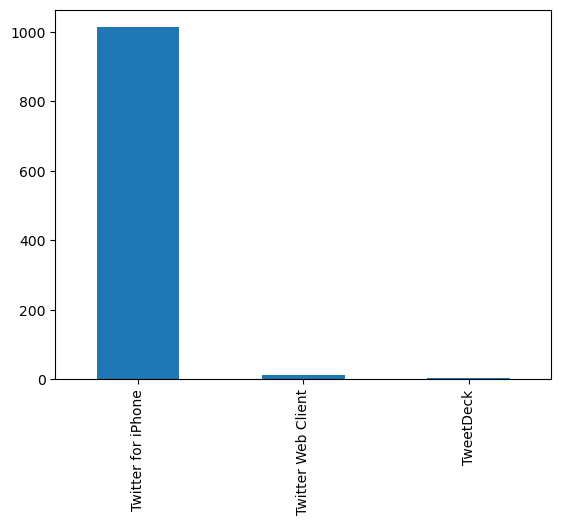

In [65]:
twitter_archive_master.source.value_counts().plot(kind = 'bar')
twitter_archive_master.source.value_counts()['Twitter for iPhone']/twitter_archive_master.source.count()

### 2. Dog stage: 67% of the tweets are about dogs in pupper stage

0.6475409836065574

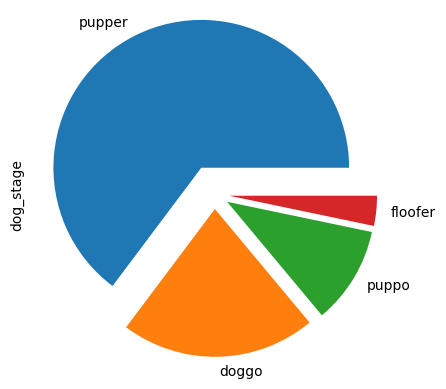

In [66]:
explode = (0.2, 0.1, 0.1, 0.1) 
twitter_archive_master.dog_stage.value_counts().plot(kind = 'pie', explode=explode)
twitter_archive_master.dog_stage.value_counts()['pupper']/twitter_archive_master.dog_stage.count()

### 3. Dog Types: More than 25% of the tweets are about Top 5 most popular dogs combined  


0.2818270165208941

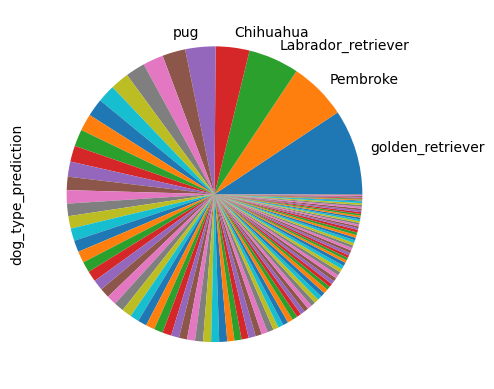

In [69]:
dog_type_prediction_list = []
prediction_confidence_list = []

def combine_prediction_confidence(df):
    if df['p1_dog']:
        dog_type_prediction_list.append(df['p1'])
        prediction_confidence_list.append(df['p1_conf'])
    elif df['p2_dog']:
        dog_type_prediction_list.append(df['p2'])
        prediction_confidence_list.append(df['p2_conf'])
    elif df['p3_dog']:
        dog_type_prediction_list.append(df['p3'])
        prediction_confidence_list.append(df['p3_conf'])
    else:
        dog_type_prediction_list.append(np.nan)
        prediction_confidence_list.append(np.nan)
        
twitter_archive_master.apply(combine_prediction_confidence,axis=1)
twitter_archive_master['dog_type_prediction']=dog_type_prediction_list
twitter_archive_master['prediction_confidence']=prediction_confidence_list
twitter_archive_master=twitter_archive_master.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)


labels = np.full(len(twitter_archive_master.dog_type_prediction.value_counts()), "", dtype=object)
labels[0]='golden_retriever'
labels[1]='Pembroke'
labels[2]='Labrador_retriever'
labels[3]='Chihuahua'
labels[4]='pug'
twitter_archive_master.dog_type_prediction.value_counts().plot(kind = 'pie', labels=labels)


((twitter_archive_master.dog_type_prediction.value_counts()['golden_retriever']+
 twitter_archive_master.dog_type_prediction.value_counts()['Pembroke']+
 twitter_archive_master.dog_type_prediction.value_counts()['Labrador_retriever']+
 twitter_archive_master.dog_type_prediction.value_counts()['Chihuahua']+
 twitter_archive_master.dog_type_prediction.value_counts()['pug'])
 / twitter_archive_master.dog_type_prediction.count())

### Visualization

### Popularity vs Ratings
Dogs having more ratings have more likes as well. Yayy!!! Twitter followers do agree with WeRateDogs ratings.

In [70]:
twitter_archive_master[twitter_archive_master.rating_numerator<200].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,retweet_count,favorite_count,dog_type_prediction,prediction_confidence
0,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,6514,33819,Chihuahua,0.323581
1,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,4328,25461,Chihuahua,0.716012
2,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,9774,41048,basset,0.555712
3,890609185150312448,nan,nan,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,4429,28226,Irish_terrier,0.487574
4,890240255349198849,nan,nan,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,7711,32467,Pembroke,0.511319


Text(0, 0.5, 'Favorite Count')

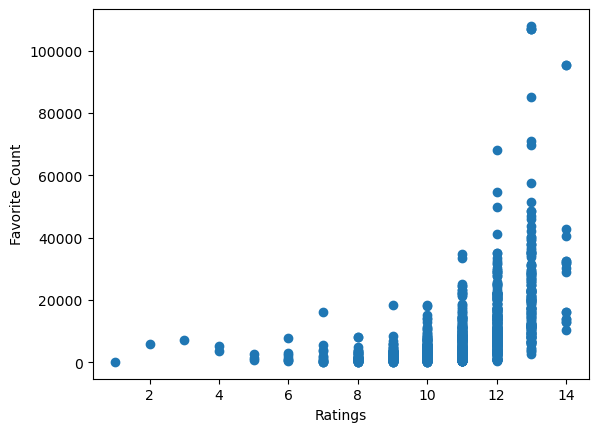

In [71]:
plt.scatter(twitter_archive_master[twitter_archive_master.rating_numerator<=20].rating_numerator,twitter_archive_master[twitter_archive_master.rating_numerator<20].favorite_count)
plt.xlabel('Ratings')
plt.ylabel('Favorite Count')

### Retweets and Favorites over time
Trend to show people tend to like vs retweeting. The trend looks to be increasing over time.

In [72]:
twitter_archive_master.set_index('timestamp', inplace=True)

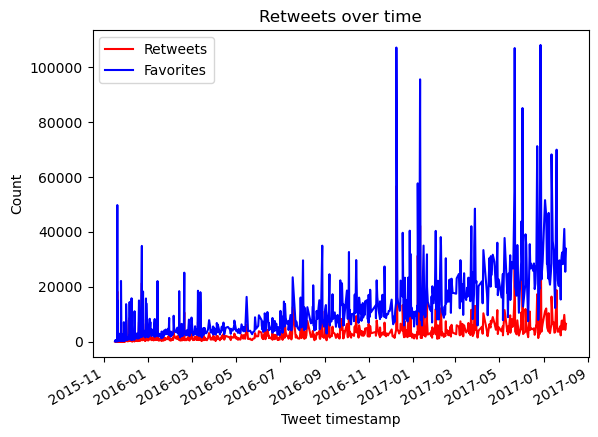

In [73]:
twitter_archive_master['retweet_count'].plot(color = 'red', label='Retweets')
twitter_archive_master['favorite_count'].plot(color = 'blue', label='Favorites')

plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets over time')
plt.savefig('retweets_favorites.png')
plt.show()